In [87]:
%load_ext autoreload
%autoreload
import numpy as np
import h5py
import progressbar
import tensorflow as tf



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
def training_batch(N):
    batch = np.zeros((N,16))
    for n in range(N):
        batch[n,np.random.randint(0,16)] = 1
    return batch
    

### 

In [89]:
tf.reset_default_graph()
%load_ext autoreload
%autoreload
from rbm import RBM
rbm = RBM(visible_size=16, hidden_size=1024)

sess = tf.InteractiveSession()

rbm.attach_session(sess)

bar = progressbar.ProgressBar()
for i in bar(range(10000)):
    rbm.train(v_init=training_batch(32))

/usr/local/lib/python3.6/site-packages/tensorflow/python/client/session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
N/A% (0 of 10000) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100% (10000 of 10000) |##################| Elapsed Time: 0:00:28 Time:  0:00:28


In [90]:
x = rbm.inference(v_init=np.random.rand(32,16))
X = training_batch(32)

(array([ 8.,  0.,  0., 13.,  0.,  0.,  8.,  0.,  0.,  3.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

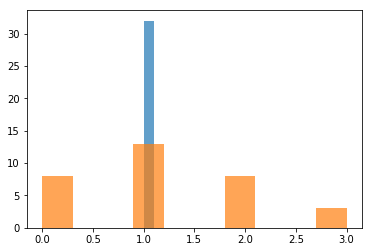

In [91]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
ax.hist(X.sum(axis=1), alpha=0.7)
ax.hist(x.sum(axis=1), alpha=0.7)

In [92]:
print (x)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [104]:
X_train = training_batch(10000)

In [95]:
from sklearn.neural_network import BernoulliRBM

In [107]:
rbm = BernoulliRBM(n_components=1024, learning_rate=0.01, random_state=0, verbose=True)
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -3.88, time = 0.83s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -3.96, time = 1.60s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -3.93, time = 1.45s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -3.87, time = 1.46s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -3.92, time = 1.47s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -3.99, time = 1.46s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -3.90, time = 1.45s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -3.90, time = 1.48s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -3.94, time = 1.50s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -4.06, time = 1.53s


BernoulliRBM(batch_size=10, learning_rate=0.01, n_components=1024, n_iter=10,
       random_state=0, verbose=True)

In [116]:
t = X_train[0].copy()
for i in range(40):
    t = rbm.gibbs(t)*1.0
    print(t)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]


In [111]:
print 

<function print>